In [1]:
import tensorflow as tf
import keras.backend as K
import pickle
import numpy as np

from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

import matplotlib.pyplot as plt

In [2]:
# User-defined const
import const

In [3]:
# Needs to be here if using NVIDIA GPU, otherwise model wouldnt fit (Skip if training without dGPU)
tf.get_logger().setLevel('ERROR')
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# Use ResNet50 as our base NN
resnet = ResNet50(include_top=False, pooling='avg')
model = Sequential()
model.add(resnet)
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.layers[0].trainable = False

In [5]:
# Print our model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [6]:
# Define and Compile our model
sgd = SGD(lr=0.002, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='kld', optimizer=sgd, metrics=['accuracy'])

In [7]:
# Load our training data
label_dist = pickle.load(open(const.TRAINING_FILE, 'rb'))

In [8]:
# Separate label + imgs
train_X = np.array([x[1]
                   for x in label_dist[0:len(label_dist)]])
train_Y = np.array([x[2]
                   for x in label_dist[0:len(label_dist)]])


In [9]:
# Add early stopping, in general it stops around 50 epochs
earlyStopping = EarlyStopping(
    monitor='val_loss', patience=15, verbose=0, mode='auto')

In [10]:
# Train NN for 100 epochs
history = model.fit(x=train_X, y=train_Y, batch_size=32, callbacks=[
                    earlyStopping], epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
338/338 [==============================] - 42s 88ms/step - loss: 0.8653 - accuracy: 0.6590 - val_loss: 0.6226 - val_accuracy: 0.7431
Epoch 2/100
338/338 [==============================] - 21s 63ms/step - loss: 0.6763 - accuracy: 0.7244 - val_loss: 0.6971 - val_accuracy: 0.6264
Epoch 3/100
338/338 [==============================] - 21s 62ms/step - loss: 0.6592 - accuracy: 0.7398 - val_loss: 0.6085 - val_accuracy: 0.7598
Epoch 4/100
338/338 [==============================] - 21s 62ms/step - loss: 0.6489 - accuracy: 0.7360 - val_loss: 0.6619 - val_accuracy: 0.7440
Epoch 5/100
338/338 [==============================] - 21s 62ms/step - loss: 0.6578 - accuracy: 0.7283 - val_loss: 0.7347 - val_accuracy: 0.5955
Epoch 6/100
338/338 [==============================] - 21s 62ms/step - loss: 0.6421 - accuracy: 0.7335 - val_loss: 0.6635 - val_accuracy: 0.7431
Epoch 7/100
338/338 [==============================] - 22s 65ms/step - loss: 0.6537 - accuracy: 0.7290 - val_loss: 0.5981 - val_ac

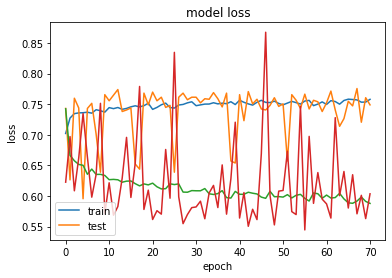

In [15]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')

fig.savefig('Performance.png')

In [13]:
# Save our trained weights
model.save_weights(const.TRAINEDMODEL_FILE)

In [14]:
history.history

{'loss': [0.7424792647361755,
  0.6663759350776672,
  0.6575490236282349,
  0.6516107320785522,
  0.6501525044441223,
  0.6355177164077759,
  0.6439545154571533,
  0.6352738738059998,
  0.6353897452354431,
  0.6335935592651367,
  0.626659095287323,
  0.627140998840332,
  0.6264863610267639,
  0.6225246787071228,
  0.6242468953132629,
  0.6245334148406982,
  0.6201351284980774,
  0.6165248155593872,
  0.6197344660758972,
  0.6181522607803345,
  0.621001660823822,
  0.615034818649292,
  0.6115844249725342,
  0.6119487881660461,
  0.6198875308036804,
  0.6186561584472656,
  0.6198253035545349,
  0.6063731908798218,
  0.6061458587646484,
  0.6088025569915771,
  0.6085169911384583,
  0.6084930896759033,
  0.6121435165405273,
  0.6036468148231506,
  0.6024462580680847,
  0.6039329171180725,
  0.6087249517440796,
  0.5972920656204224,
  0.5966301560401917,
  0.6074879169464111,
  0.6027604341506958,
  0.6027634739875793,
  0.6061391830444336,
  0.6045423150062561,
  0.6033266186714172,
  0.59